<a href="https://colab.research.google.com/github/MaryamMortazaviSefat/new/blob/main/q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#load data
!wget -q https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py
!wget -q https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#from scipy import io


#from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
#from sklearn.decomposition import PCA
#import time
#import cv2

from data_hoda import knn_classifier,load_hoda


In [24]:
x_train,y_train,x_test,y_test=load_hoda(size=25)

In [25]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [55]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(np.prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

shape = (625,)
latent_dim = 2
autoencoder = Autoencoder(latent_dim, shape)


In [56]:
auto=autoencoder(x=x_test[:3])

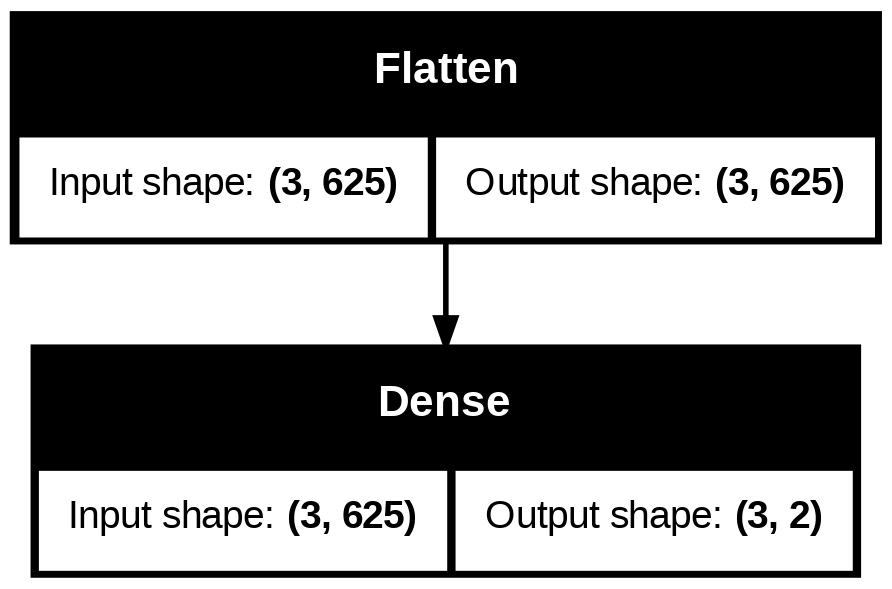

In [57]:
keras.utils.plot_model(autoencoder.encoder,show_shapes=True)

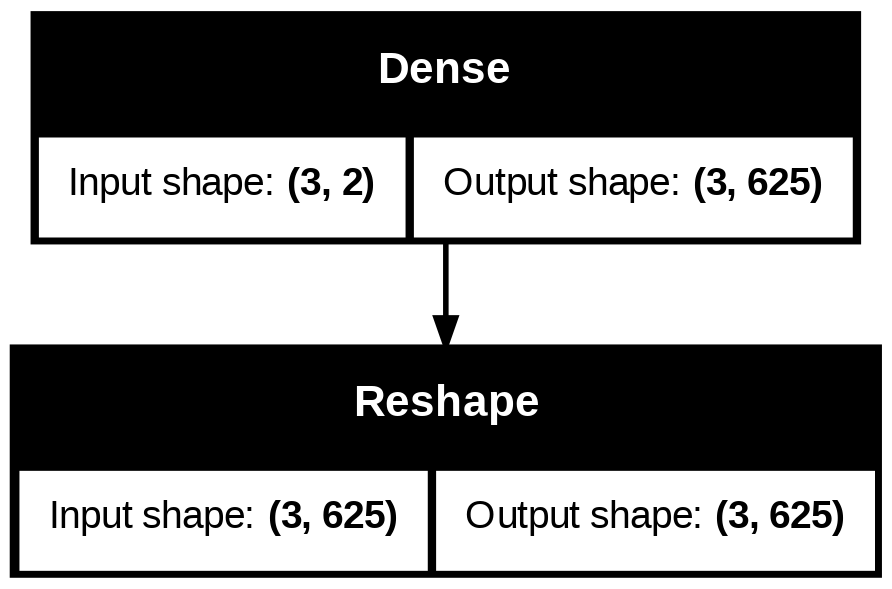

In [58]:
keras.utils.plot_model(autoencoder.decoder,show_shapes=True)

In [102]:
autoencoder.compile(optimizer='adam',loss=losses.BinaryCrossentropy)


In [103]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5117 - val_loss: 0.5024
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5110 - val_loss: 0.5013
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5095 - val_loss: 0.5006
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5073 - val_loss: 0.5002
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5023 - val_loss: 0.4997
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5031 - val_loss: 0.4996
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5041 - val_loss: 0.4996
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5010 - val_loss: 0.4995
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4977 - val_loss: 0.4991
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5006 - val_loss: 0.4991
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5050 - val_loss: 0.4987
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5013 - val_lo

In [104]:
pred=autoencoder.predict(x_train)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


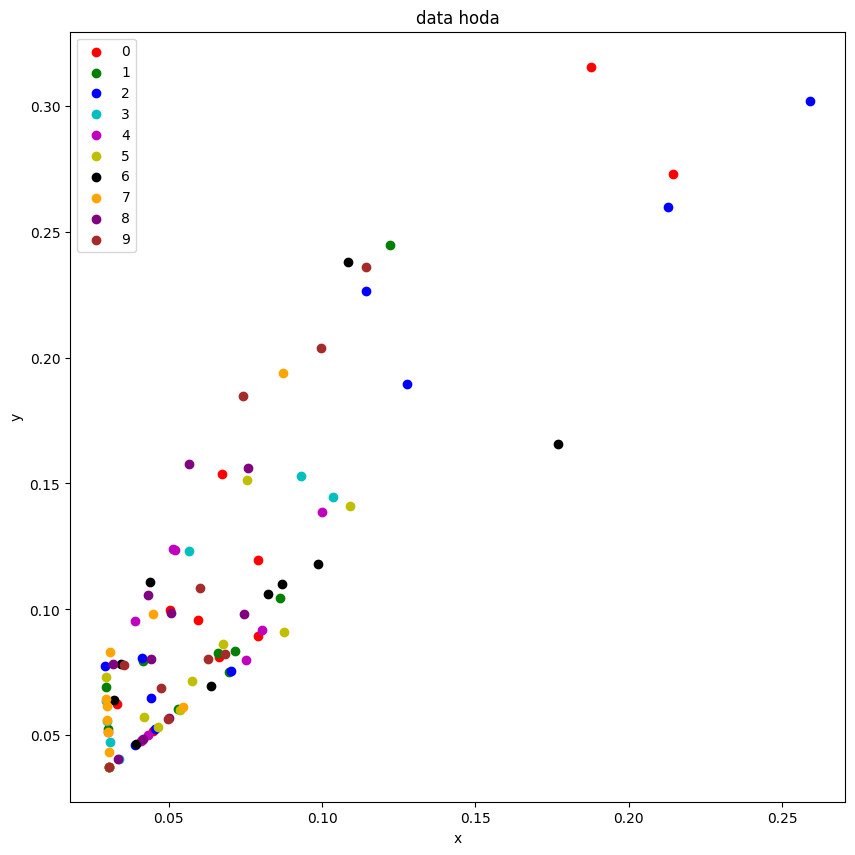

In [105]:
plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for i in range(10):
    indices = np.where(y_test == i)[0]
    chosen_indices = indices[:10]
    plt.scatter(pred[chosen_indices, 0], pred[chosen_indices, 1], c=colors[i], label=str(i))

plt.title("data hoda")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

تفکیک رنگ ها رضایت بخش نیست